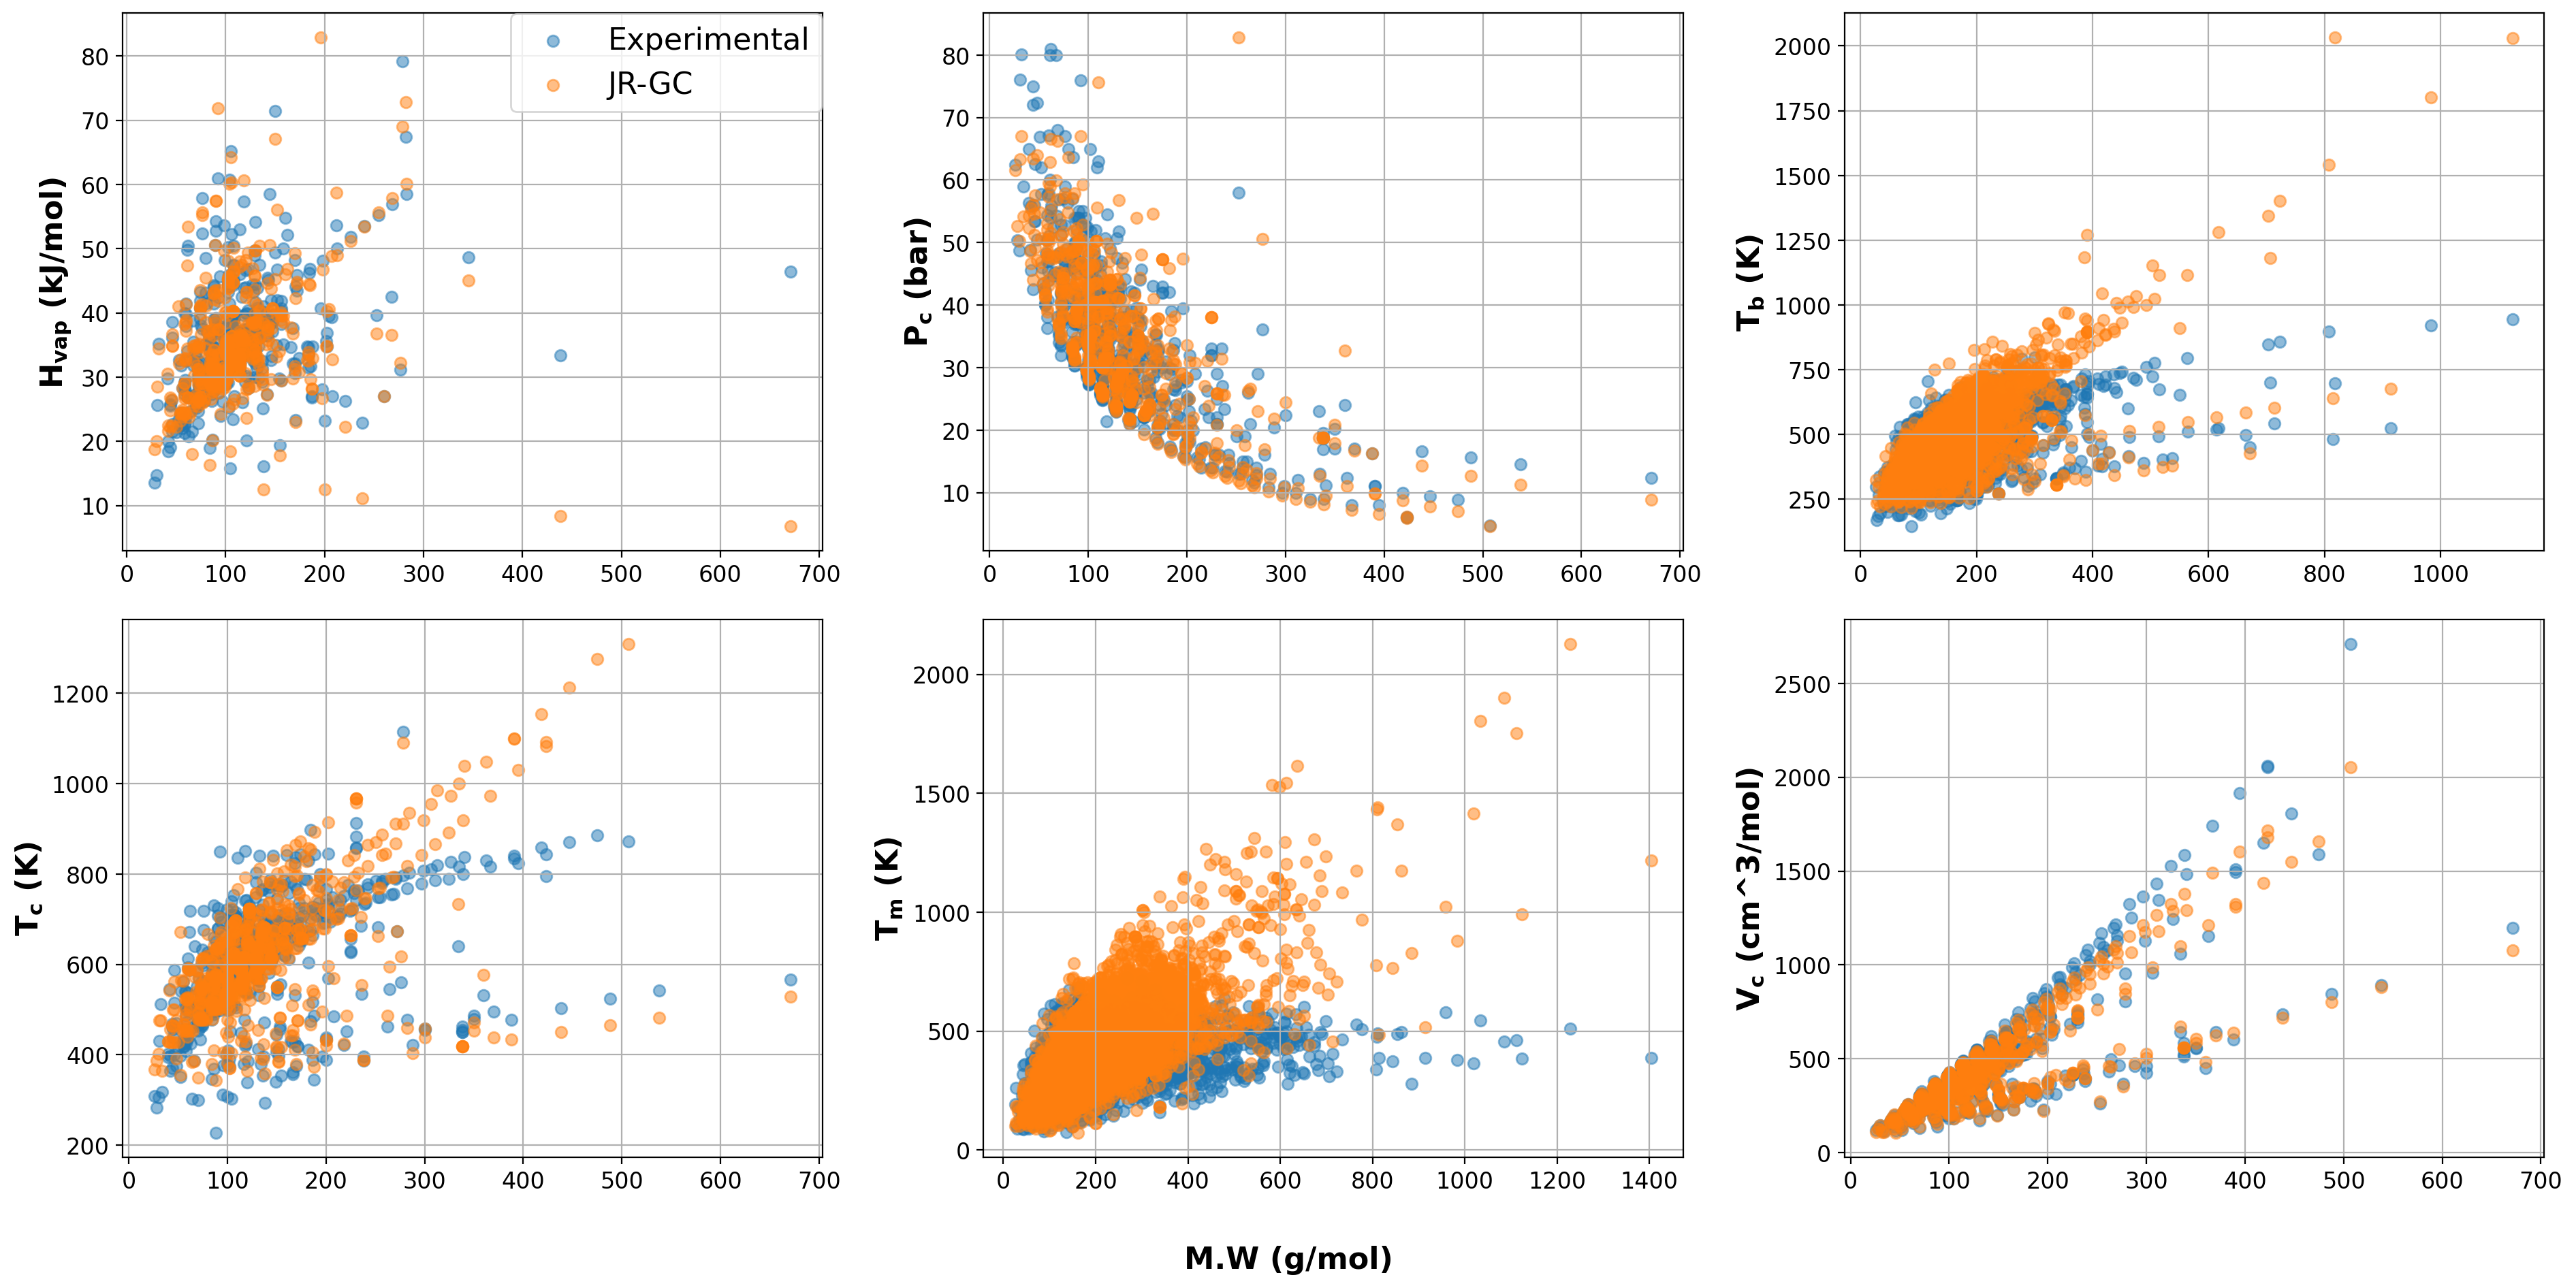

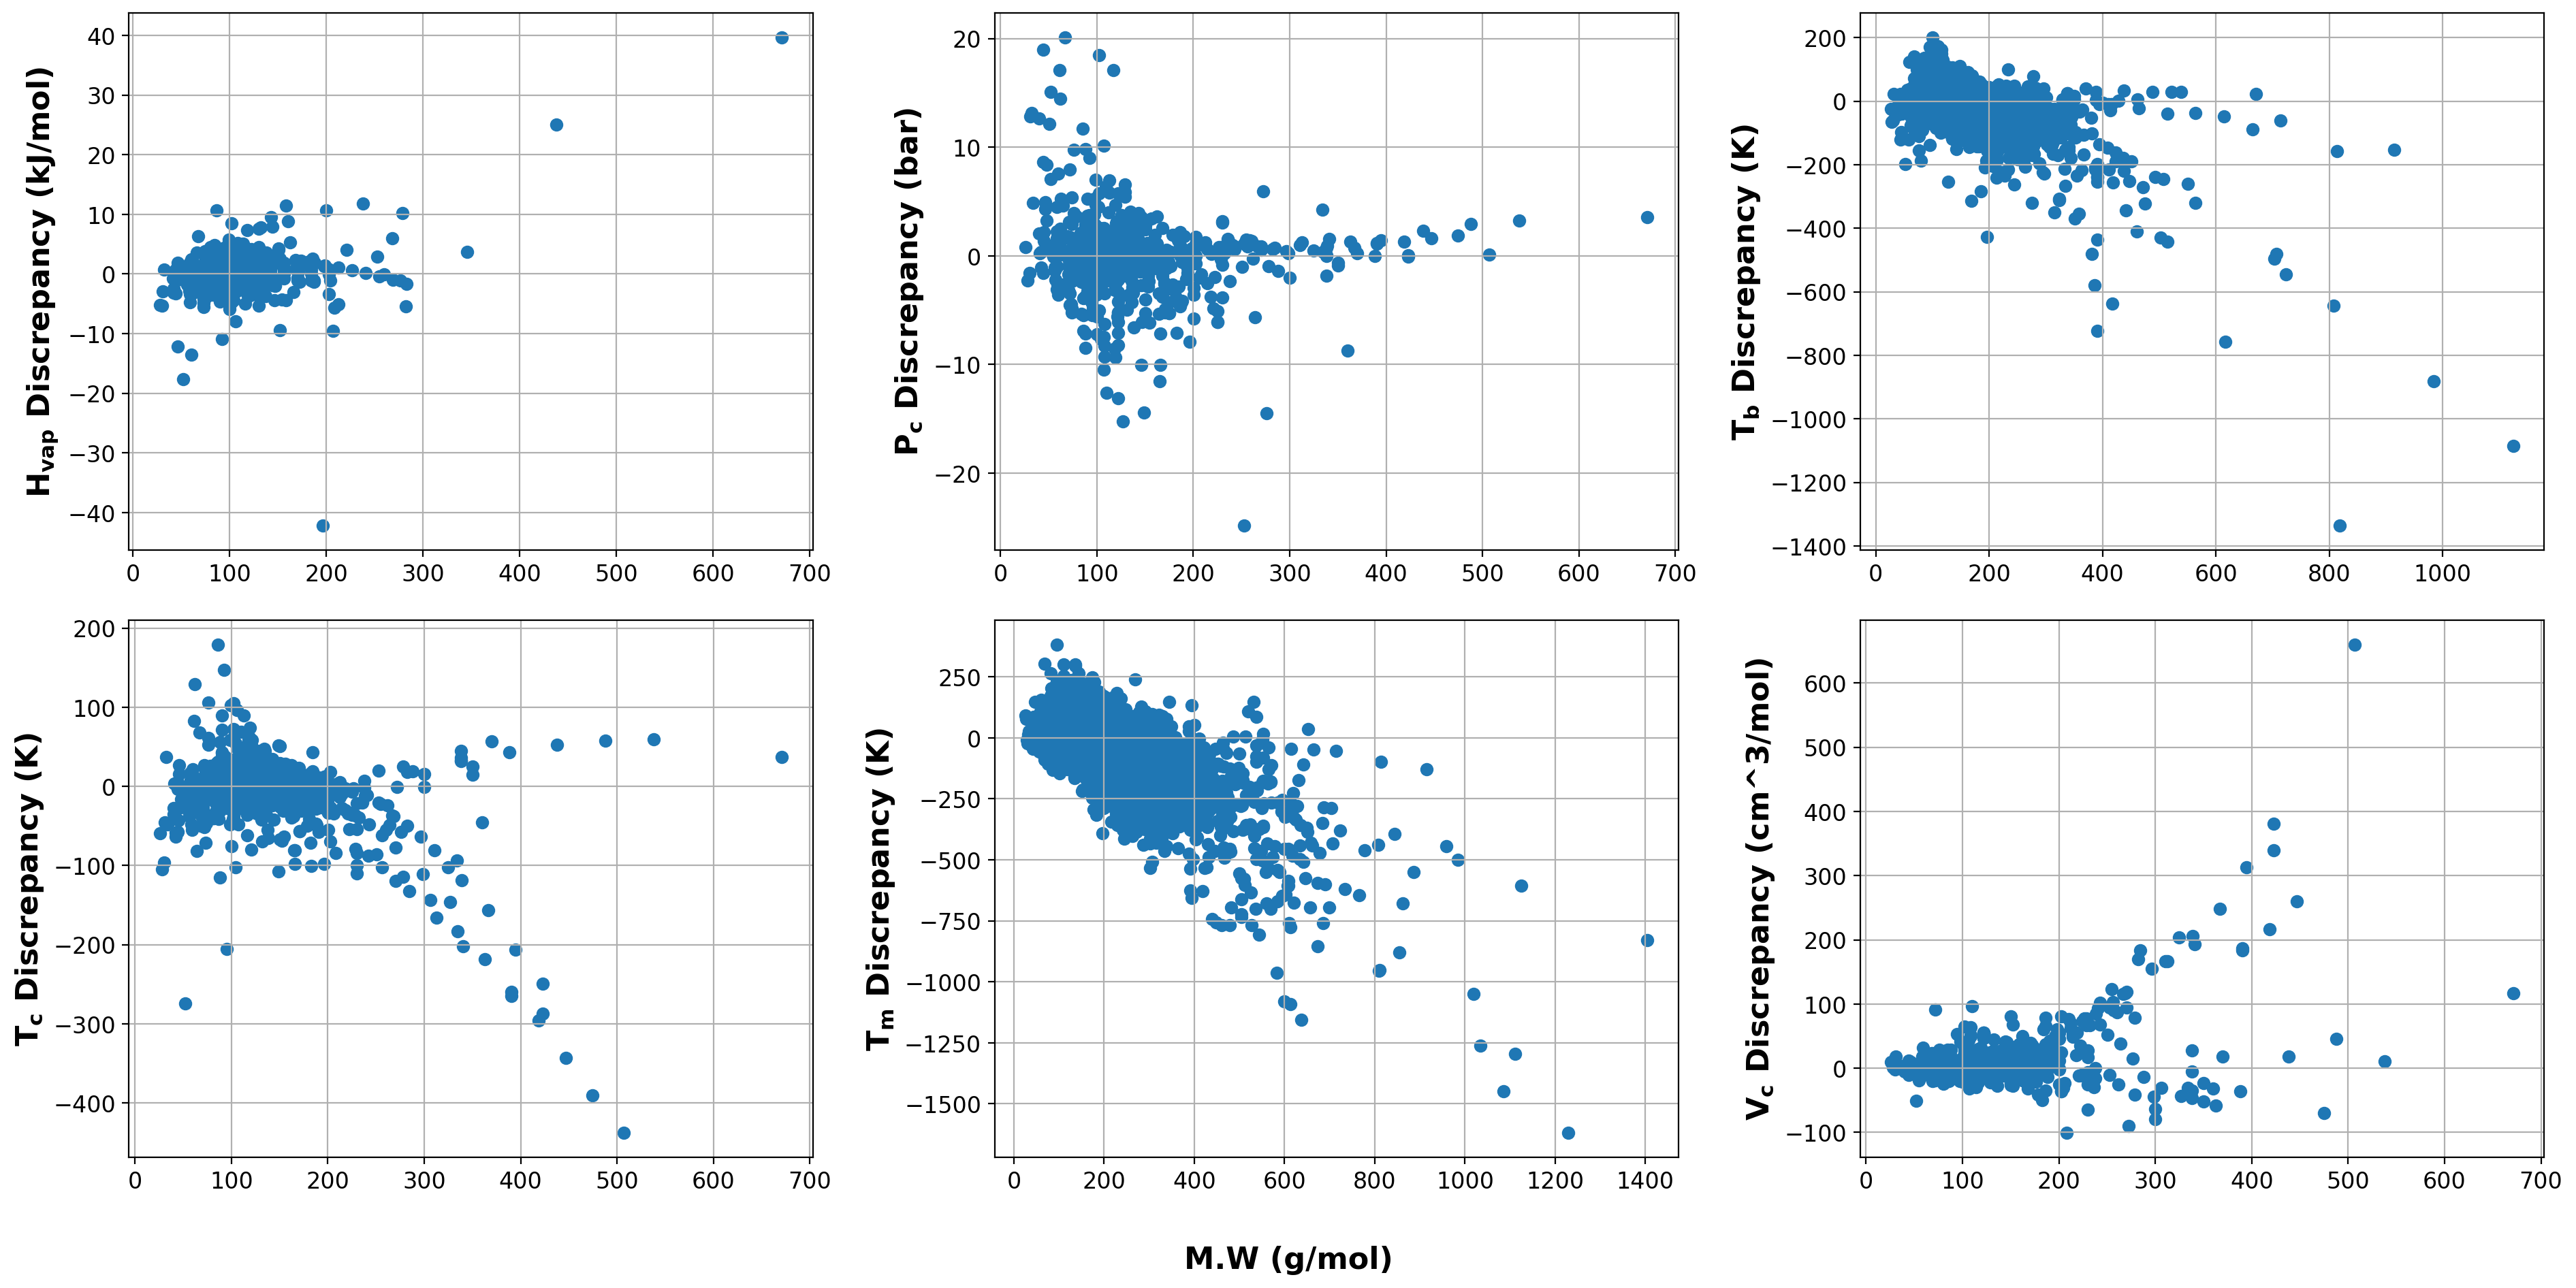

In [29]:
# =============================================================================
# Imports
# =============================================================================

# General
import os
import warnings
import time

# Specific
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import gpflow
from matplotlib import pyplot as plt
# from utils import normalize, gpPredict, buildGP, parity_plot, stratifyvector, get_gp_data, discrepancy_to_property, gpConfig_from_method

# =============================================================================
# Configuration
# =============================================================================
# Path to database folder
# dbPath=r'C:\Users\dinis\Desktop\Barnabas\Databases'
dbPath=""
# Property Code # 'Tb','Tm','Hvap', 'Vc', 'Pc', 'Tc'
codes = ['Hvap', 'Pc', 'Tb', 'Tc', 'Tm', 'Vc']
units = ['kJ/mol', 'bar', 'K', 'K', 'K', 'cm^3/mol']
save_plot = True

plt.rcParams['axes.titlesize']=16
plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['font.size']=16

def code_to_label(code, unit):
    if code == 'Hvap':
        code_real = 'H_{vap}'
    elif code == 'Pc':
        code_real = 'P_{c}'
    elif code == 'Tb':
        code_real = 'T_{b}'
    elif code == 'Tc':
        code_real = 'T_{c}'
    elif code == 'Tm':
        code_real = 'T_{m}'
    elif code == 'Vc':
        code_real = 'V_{c}'

    disc_end = " Discrepancy (" + unit + ")"
    norm_end = " (" + unit + ")"
    return code_real, norm_end, disc_end
# =============================================================================
# Main Script
# =============================================================================
if save_plot:
    dir_root = "Data_Vis_Figs/"
    os.makedirs(dir_root, exist_ok=True)

#Make plots of data
plt.rcParams['figure.dpi'] = 200

fig, ax_norm = plt.subplots(nrows = 2, ncols=3, figsize = (3*6.4,2*4.8))
ax_norm = ax_norm.flatten()
fig2, ax_disc = plt.subplots(nrows = 2, ncols=3, figsize = (3*6.4,2*4.8))
ax_disc = ax_disc.flatten()
#For each code, make a plot of Y_GC vs Y_exp values
for i in range(len(codes)):
    code = codes[i]
    unit = units[i]
    ax = ax_norm[i]
    ax2 = ax_disc[i]
    #Load Data
    db=pd.read_csv(os.path.join(dbPath,code+'_prediction_data.csv'))
    db=db.dropna()
    X=db.iloc[:,2:-1].copy().to_numpy('float')
    data_names=db.columns.tolist()[2:]
    Y=db.iloc[:,-1].copy().to_numpy('float')
    Y_exp = Y.reshape(-1,1)
    Y_gc = X[:,-1].reshape(-1,1)

    #Get y label for plot
    code_real, norm_end, disc_end = code_to_label(code, unit)
    #Mw vs property Predictions
    ax.scatter(X[:,0], Y_exp, label='Experimental', alpha = 0.5)
    ax.scatter(X[:,0], Y_gc, label='JR-GC', alpha = 0.5)
    ax.set_ylabel(r'$\mathbf{' +code_real + '}$' + norm_end, fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid()

    # M.W vs property Discrepancy Predictions
    ax2.scatter(X[:,0], Y_exp - Y_gc)
    ax2.set_ylabel(r'$\mathbf{' +code_real + '}$' + disc_end, fontsize=16, fontweight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.grid()

fig.supxlabel("M.W (g/mol)", fontsize = 16, fontweight='bold')
fig2.supxlabel("M.W (g/mol)", fontsize = 16, fontweight='bold')

#Get legend information and make colorbar on last plot
handles, labels = ax_norm[0].get_legend_handles_labels()
#Plots legend
if labels:
    ax_norm[0].legend(handles, labels, loc="upper right", borderaxespad=0.02)

fig.tight_layout()
fig2.tight_layout()

if save_plot:
    fig2.savefig(dir_root+"/MW_vs_Disc.png", dpi=300, bbox_inches='tight')
else:
    plt.show()

if save_plot:
    fig.savefig(dir_root+"/MW_vs_Prop.png", dpi=300, bbox_inches='tight')
else:
    plt.show()